# Factors Effecting Interest Rate for Borrowers

## Investigation Overview

In this investigation, it explores what factors were involved in assigning a borrower a certain interest rate when getting a loan.

## Dataset Overview

The dataset that was used contained over 110,000 different entries that had around 80 different columns.  The dataset used for the following analysis was filtered down to four different columns that includes borrower interest rate, if the borrower is a homeowner, credit score range, and income range.  Duplicate entries were removed, and the credit score columns were combined to show a range from 350-900 in intervals of 40.

In [1]:
#import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading dataset
df_main = pd.read_csv('prosperLoanData.csv')

In [4]:
#column list for explanatory dataframe

column_list = ['ListingKey', 'BorrowerRate', 'IsBorrowerHomeowner','CreditScoreRangeLower', 
               'CreditScoreRangeUpper', 'IncomeRange']

In [5]:
#creation of df_main_explain

df_main_explain = df_main.copy()
df_main_explain = df_main_explain[column_list]

In [6]:
#filling nulls in credit score range columns with 0

df_main_explain['CreditScoreRangeLower'].fillna(0, inplace=True)
df_main_explain['CreditScoreRangeUpper'].fillna(0, inplace=True)

In [7]:
#querying CreditScoreRangeLower to have values only above 350

df_main_explain = df_main_explain.query('CreditScoreRangeLower > 350')

In [8]:
#converting both columns to integer datatype from float to drop .0

df_main_explain['CreditScoreRangeLower'] = df_main_explain['CreditScoreRangeLower'].astype(int)
df_main_explain['CreditScoreRangeUpper'] = df_main_explain['CreditScoreRangeUpper'].astype(int)

In [9]:
#resetting index
df_main_explain = df_main_explain.reset_index(drop=True)

In [10]:
#Converting values by multiples divisible by 40

for x in range(df_main_explain.shape[0]):
    result1 = 0
    result2 = 0
    value1 = df_main_explain['CreditScoreRangeLower'][x]
    value2 = df_main_explain['CreditScoreRangeUpper'][x]
    
    if value1 % 40 == 20:
        result1 -= 20
    if (value2 % 40 == 19) & (value2 != 899):
        result2 += 20
        
    result1 += value1
    result2 += value2
    df_main_explain['CreditScoreRangeLower'][x] = result1
    df_main_explain['CreditScoreRangeUpper'][x] = result2

<ipython-input-10-c94dced02d67>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_explain['CreditScoreRangeLower'][x] = result1
<ipython-input-10-c94dced02d67>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_explain['CreditScoreRangeUpper'][x] = result2


In [11]:
#Converting both columns to string datatypes

df_main_explain['CreditScoreRangeLower'] = df_main_explain['CreditScoreRangeLower'].astype(str)
df_main_explain['CreditScoreRangeUpper'] = df_main_explain['CreditScoreRangeUpper'].astype(str)

In [12]:
#Creating a new column, CreditScoreRange combining the Lower and Upper columns and using a '-' between both of them

df_main_explain['CreditScoreRange'] = df_main_explain['CreditScoreRangeLower'] + " - " + df_main_explain['CreditScoreRangeUpper']

In [13]:
#Dropping The lower and upper credit score range columns

df_main_explain.drop(['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis = 1, inplace = True)

In [14]:
#Removing duplicates rows from dataset only keeping first value of ListingKey

df_main_explain = df_main_explain.drop_duplicates(subset = 'ListingKey', keep='first')
df_main_explain = df_main_explain.reset_index(drop=True)

In [16]:
#converting values in IsBorrowerHomeowner to 'Homeowner' if True and 'Not a homeowner' if False
df_main_explain['Homeowner'] = df_main_explain['IsBorrowerHomeowner'].replace({True:'Homeowner', False:'Not a Homeowner'})

In [17]:
#dropping IsBorrowerHomeowner Column
df_main_explain.drop('IsBorrowerHomeowner', axis=1, inplace=True)

In [18]:
#converting columns listed above as categorical to categorical data types

df_main_explain['CreditScoreRange'] = df_main_explain['CreditScoreRange'].astype('category')
df_main_explain[['Homeowner', 'IncomeRange']] = df_main_explain[['Homeowner', 'IncomeRange']].astype('category')

## Distribution of Interest Rate

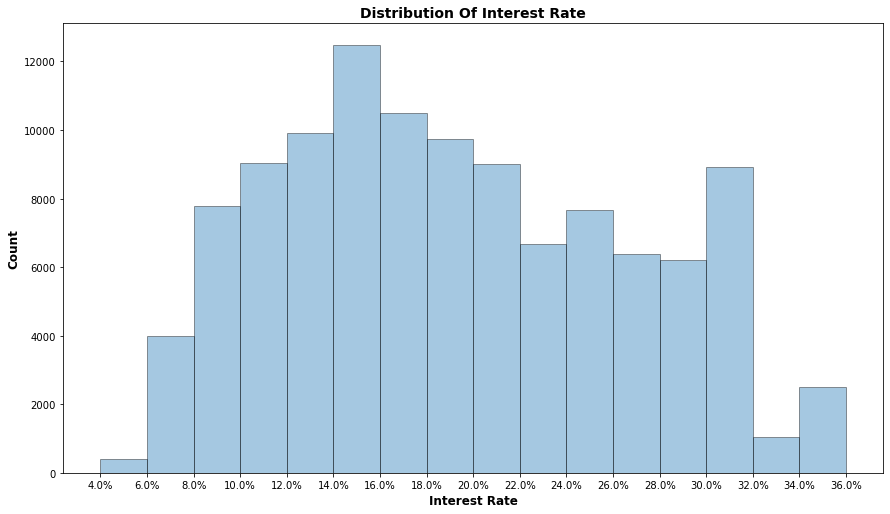

In [21]:
#looking at a simple plot of BorrowerRate with bin edges starting at 0.04 and ending at the max BorrowerRate value

plt.figure(figsize=[14.70, 8.27])

binedges = np.arange(0.04, df_main_explain['BorrowerRate'].max() + 0.02, 0.02)
binedges_label = ['{:0.1%}'.format(v) for v in binedges]

sns.distplot(df_main_explain['BorrowerRate'], bins = binedges, kde=False, hist_kws = dict (edgecolor = "black"));
plt.xticks(binedges, binedges_label)
plt.title('Distribution of Interest Rate'.title(), fontsize = 14, weight="bold")
plt.ylabel('count'.title(), fontsize=12, weight="bold");
plt.xlabel('Interest Rate'.title(), fontsize=12, weight="bold");

The distribution of interest rate falls between 4% and 36% for the borrowers in the dataset.  It shows a bell curve distribution with a couple of spikes at 15% and 30%.

## Distribution of Credit Scores

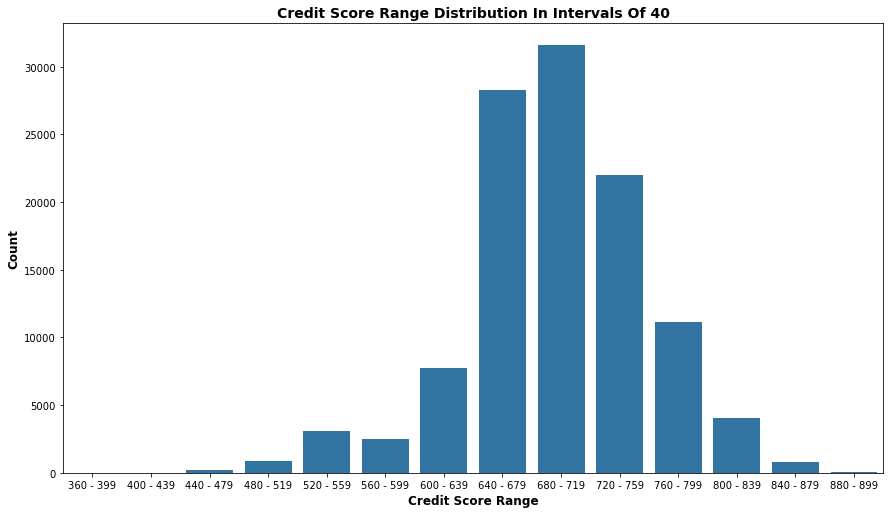

In [24]:
#CreditScoreRange distribution

plt.figure(figsize=[14.70, 8.27])
base_color = sns.color_palette()[0]
sns.countplot(data=df_main_explain, x='CreditScoreRange', color=base_color)
plt.title('Credit Score Range Distribution in Intervals of 40'.title(), fontsize=14, weight="bold")
plt.ylabel('Count'.title(), fontsize=12, weight="bold")
plt.xlabel('Credit Score Range'.title(), fontsize=12, weight="bold");

This shows the range of the borrowers having a credit score of 360 to 900.  It shows most of the borrowers having a credit score between 600 and 800.

## Credit Scores vs Interest Rate

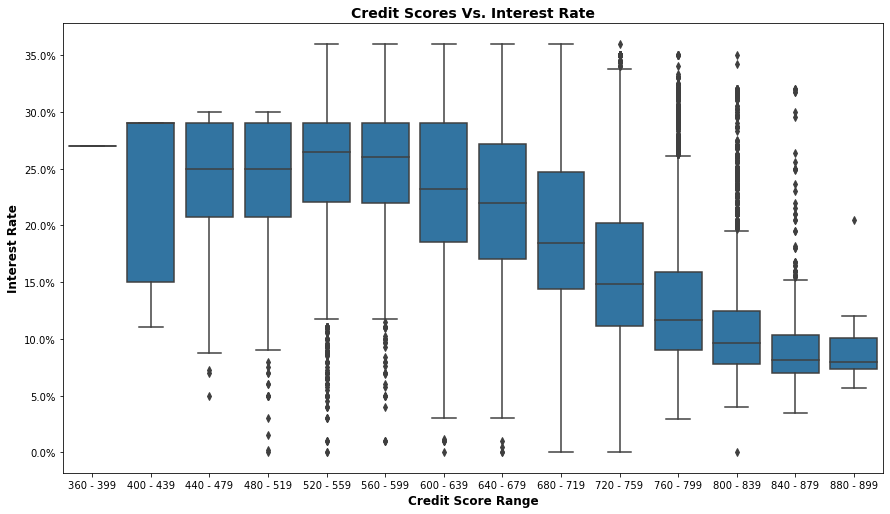

In [27]:
plt.figure(figsize=[14.70, 8.27])

binedges1 = np.arange(0.0, 0.35+0.05, 0.05)
binedges1_label = ['{:0.1%}'.format(v) for v in binedges1]

sns.boxplot(data=df_main_explain, x='CreditScoreRange', y='BorrowerRate', color=base_color)
plt.yticks(binedges1, binedges1_label)
plt.title('Credit Scores vs. Interest Rate'.title(), fontsize=14, weight="bold")
plt.ylabel('Interest Rate'.title(), fontsize=12, weight="bold")
plt.xlabel('Credit Score Range'.title(), fontsize=12, weight="bold");

While the graph looks a little messy showing the dots, which are outliers for some borrowers in the dataset, most borrowers are  getting assigned a lower interest rate if they have a higher credit score.

## Interest Rate vs Homeowner Status 

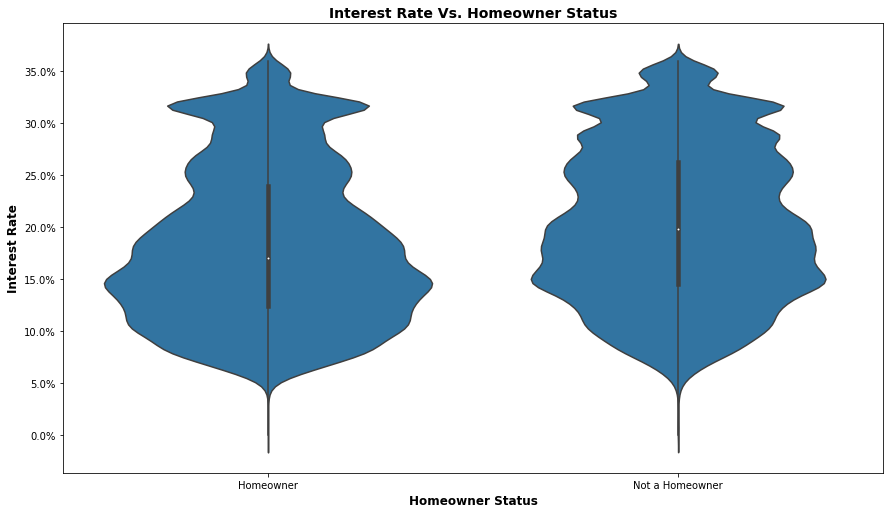

In [29]:
plt.figure(figsize=[14.70, 8.27])

sns.violinplot(data=df_main_explain, x='Homeowner', y='BorrowerRate', color=base_color)
plt.title('Interest Rate vs. Homeowner Status'.title(), fontsize=14, weight="bold")
plt.yticks(binedges1, binedges1_label)
plt.ylabel('Interest Rate'.title(), fontsize=12, weight="bold")
plt.xlabel('Homeowner Status'.title(), fontsize=12, weight="bold");

These two violin plots illustrate the relationship if a borrower is a homeowner.  IF the borrower is a homeowner, it shows the shape of the violin is wider at the bottom and narrower on top while the reverse is true if the borrower is not a homeowner.

## Interest Rate vs Credit Scores Comparing Homeownership

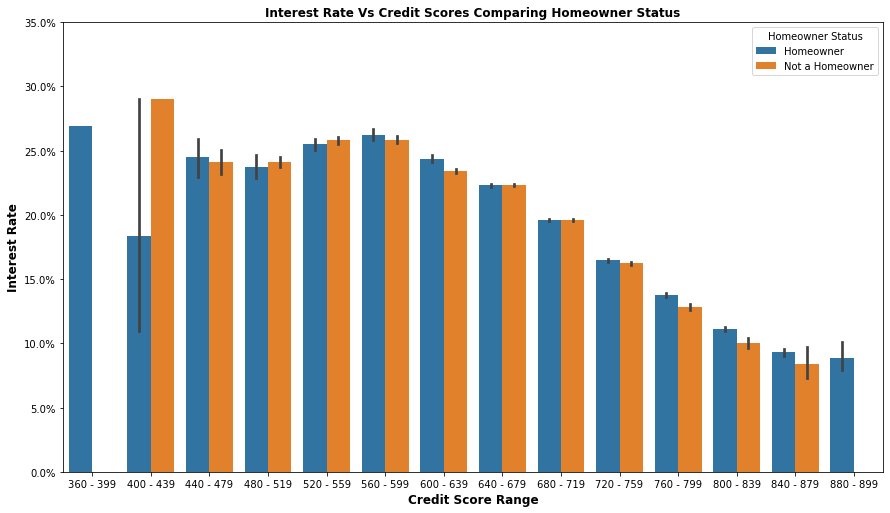

In [35]:
plt.figure(figsize=[14.70, 8.27])

sns.barplot(data = df_main_explain, x = 'CreditScoreRange', y = 'BorrowerRate', hue = 'Homeowner')
plt.legend(loc = 1, title = 'Homeowner Status'.title())
plt.title('Interest Rate vs Credit Scores comparing Homeowner Status'.title(), fontsize=12, weight="bold")
plt.yticks(binedges1, binedges1_label)
plt.ylabel('Interest Rate'.title(), fontsize=12, weight="bold")
plt.xlabel('Credit Score Range'.title(), fontsize=12, weight="bold");


This shows Interest rate vs Credit Score Range comparing whether a borrower owns a home or not.  Unlike the violin plots, this shows that non-homeowners that have the same credit rating as a homeowner generally have a slightly lower interest rate than a homeowner, which is surprising.

## Interest Rate vs Credit Scores Comparing Income Range

In [58]:
#Loop iterating through Income Range to simplify the bar graph
df_main_explain['IncomeRangeAlt'] = '$0'

for x in range(df_main_explain.shape[0]):
    
    #Income Range
    value = df_main_explain['IncomeRange'][x]
    if value == 'Not displayed':
        value = 'Not available'
    if (value == '$0') | (value == 'Not employed'):
        value = 'Not employed'
    if (value == '$1-24,999') | (value == '$25,000-49,999'):
        value = '$1-49,999'
    if (value == '$50,000-74,999') | (value == '$75,000-99,999') | (value == '$100,000+'):
        value = '$50,000+'
    df_main_explain['IncomeRangeAlt'][x] = value

<ipython-input-58-1d591dc36faf>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_explain['IncomeRangeAlt'][x] = value


In [37]:
#Using replace method to simplify the following bar graph to combine different values

df_main_explain['IncomeRange'] = df_main_explain['IncomeRange'].replace('Not displayed', 'Not Available')
df_main_explain['IncomeRange'] = df_main_explain['IncomeRange'].replace('$0', 'Not employed')
df_main_explain['IncomeRange'] = df_main_explain['IncomeRange'].replace('$1-24,999', '$1-49,999')
df_main_explain['IncomeRange'] = df_main_explain['IncomeRange'].replace('$25,000-49,999', '$1-49,999')
df_main_explain['IncomeRange'] = df_main_explain['IncomeRange'].replace('$50,000-74,999', '$50,000+')
df_main_explain['IncomeRange'] = df_main_explain['IncomeRange'].replace('$75,000-99,999', '$50,000+')
df_main_explain['IncomeRange'] = df_main_explain['IncomeRange'].replace('$100,000+', '$50,000+')

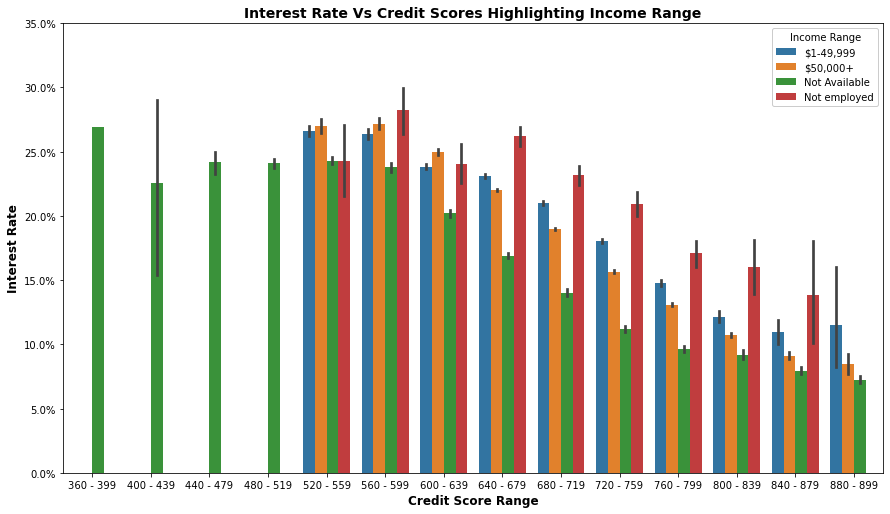

In [40]:
plt.figure(figsize=[14.70, 8.27])
sns.barplot(data = df_main_explain, x = 'CreditScoreRange', y = 'BorrowerRate', hue = 'IncomeRange')
plt.yticks(binedges1, binedges1_label)
plt.title('Interest Rate vs Credit Scores Highlighting Income Range'.title(), fontsize=14, weight="bold")
plt.ylabel('Interest Rate'.title(), fontsize=12, weight="bold")
plt.xlabel('Credit Score Range'.title(), fontsize=12, weight="bold")
plt.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Income Range');

With credit scores below 520, there is no data that reflects the income of those borrowers.  One thing that is obvious is that if borrowers are unemployed, they have a higher interest rate compared to other borrowers that have income.  Also, borrowers that are below 50k income have a slighly higher interest rate than those borrowers that make more than 50k per year.